In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import folium
import webbrowser
import numpy as np
from folium.plugins import HeatMap

In [3]:
df_RentSmart = pd.read_csv('./extension/RentSmart.csv')
df_RentSmart[:3]

,date,violation_type,description,address,neighborhood,zip_code,parcel,owner,year built,year remodeled,property_type,latitude,longitude
0,2022-11-21 00:00:00,Enforcement Violations,Improper storage trash: res,"346-348 North St, 02109",Boston,2109,303147000,THREE 46 NORTH STREET LLC MASS LLC,1899.0,2003.0,Mixed Use (Res. and Comm.),42.365260,-71.05199
1,2022-11-21 00:00:00,Enforcement Violations,Improper storage trash: res,"10 Margaret St, 02113",Boston,2113,302251000,ABBONDANZA JOSEPH,1910.0,2018.0,Residential 4 or more family,42.365770,-71.05586
2,2022-11-21 00:00:00,Enforcement Violations,Improper storage trash: res,"91-93 Prince St, 02113",Boston,2113,302253000,PRINCE CAPITAL LLC MASS LLC,1910.0,2008.0,Residential 7 or more units,42.365708,-71.05614


In [4]:
df_Building = pd.read_csv('extension/Building and Property Violations.csv')
df_Building[:3]

,case_no,status_dttm,status,code,value,description,violation_stno,violation_sthigh,violation_street,violation_suffix,...,ward,contact_addr1,contact_addr2,contact_city,contact_state,contact_zip,sam_id,latitude,longitude,location
0,HVIOL-644882,2022-11-18 09:50:19,Open,CMR410.482 A,NaN,Smoke Detectors & Carbon Monoxide Alarms - Own...,19,NaN,Adams,ST,...,15,77 Pond Ave #401,NaN,Brookline,MA,02445,175531,42.3076,-71.0634,"(42.30760000002404, -71.06340000126664)"
1,HVIOL-644882,2022-11-18 09:50:19,Open,CMR410.482 A,NaN,Smoke Detectors & Carbon Monoxide Alarms - Own...,19,NaN,Adams,ST,...,15,77 Pond Ave #401,NaN,Brookline,MA,02445,175531,42.3076,-71.0634,"(42.30760000002404, -71.06340000126664)"
2,HVIOL-644882,2022-11-18 09:50:19,Open,CRM410.550 D,NaN,"Extermination of Insects, Rodents and Skunks -...",19,NaN,Adams,ST,...,15,77 Pond Ave #401,NaN,Brookline,MA,02445,175531,42.3076,-71.0634,"(42.30760000002404, -71.06340000126664)"


# Q1

# Count Number of Violations/Complaints by Different Address(RS)

In [5]:
df_RentSmart_address = df_RentSmart.groupby(["address","latitude","longitude"])['date'].count().reset_index().sort_values(by="date", ascending=False)
df_RentSmart_address.rename(columns={'date':'count'}, inplace = True)
df_RentSmart_address.index = range(len(df_RentSmart_address))
df_RentSmart_address

,address,latitude,longitude,count
0,"1037 River St, 02136",42.259883,-71.117176,405
1,"265-275 Dartmouth St, 02116",42.350740,-71.077290,307
2,"38-40 Gardner St, 02134",42.353807,-71.129640,268
3,"72 Woodrow Ave, 02124",42.287610,-71.081300,263
4,"480-486 Norfolk St, 02126",42.279680,-71.088470,261
...,...,...,...,...
76514,"47 A Goldsmith St, 02130",42.306739,-71.118583,1
76515,"469 W Broadway #A, 02127",42.335650,-71.046230,1
76516,"2 Lee Hill Rd # 10, 02131",42.288525,-71.126355,1
76517,"469 Shawmut Ave #9, 02118",42.338984,-71.075833,1


In [6]:
# Number of data obtained
df = df_RentSmart_address
num = df.shape[0]
# Get Latitude
lat = np.array(df["latitude"][0:num])
# Get Longitude
lon = np.array(df["longitude"][0:num])
# Get price and convert it to numpy floating point
price = np.array(df["count"][0:num], dtype=float)
# Make data in the form of [lats, lons, price]
data1 = [[lat[i], lon[i], price[i]] for i in range(num) if str(lat[i])!='nan']
# Draw a Map with the center longitude and latitude [32, 120], and the starting zoom degree is 10 times
map_osm = folium.Map(location=[42.259883,-71.117176], zoom_start=10)
# Add the thermodynamic diagram to the previously established map
HeatMap(data1).add_to(map_osm)

print(map_osm)
 
file_path = r"extension/RentSmart address HeatMap.html"
# Save as html file
map_osm.save(file_path)

In [7]:
map_osm = folium.Map(location=[42.36047281889217, -71.06208556951843], zoom_start=10)
# Define colors for five clusters
rainbow = ['#8000ff', '#00b5eb', '#80ffb4', '#ffb360', '#ff0000']

for i in range(1000):
    if str(df['latitude'][i])!='nan':
        folium.Marker([df["latitude"][i], df["longitude"][i]], color='#8000ff').add_to(map_osm)

file_path = r"extension/RentSmart address Marker.html"
# Save as html file
map_osm.save(file_path)


# Count Number of Violations/Complaints by Different Address(BAPV)

In [8]:
df_address = df_Building.groupby(["latitude","longitude"])['status_dttm'].count().reset_index().sort_values(by="status_dttm", ascending=False)
df_address.rename(columns={'status_dttm':'count'}, inplace = True)
df_address.index = range(len(df_address))
df_address

,latitude,longitude,count
0,42.353256,-71.128396,32
1,42.298620,-71.079990,29
2,42.280720,-71.090650,26
3,42.372797,-71.038164,24
4,42.309756,-71.083018,22
...,...,...,...
11030,42.320830,-71.070090,1
11031,42.320810,-71.068880,1
11032,42.320809,-71.085656,1
11033,42.268690,-71.115450,1


In [9]:
# Number of data obtained
df = df_address
num = df.shape[0]
# Get Latitude
lat = np.array(df["latitude"][0:num])
# Get Longitude
lon = np.array(df["longitude"][0:num])
# Get price and convert it to numpy floating point
price = np.array(df["count"][0:num], dtype=float)
# Make data in the form of [lats, lons, price]
data1 = [[lat[i], lon[i], price[i]] for i in range(num) if str(lat[i])!='nan']
# Draw a Map with the center longitude and latitude [32, 120], and the starting zoom degree is 10 times
map_osm = folium.Map(location=[42.259883,-71.117176], zoom_start=10)
# Add the thermodynamic diagram to the previously established map
HeatMap(data1).add_to(map_osm)
 
file_path = r"extension/Building and Property Violations Address HeatMap.html"
# Save as html file
map_osm.save(file_path)

In [10]:
map_osm = folium.Map(location=[42.36047281889217, -71.06208556951843], zoom_start=10)
# Define colors for five clusters
rainbow = ['#8000ff', '#00b5eb', '#80ffb4', '#ffb360', '#ff0000']

for i in range(1000):
    if str(df['latitude'][i])!='nan':
        folium.Marker([df["latitude"][i], df["longitude"][i]], color='#8000ff').add_to(map_osm)

file_path = r"extension/Building and Property Violations Address Marker.html"
# Save as html file
map_osm.save(file_path)


# Q2

# Count Number of Different Violation Types(RS)

In [11]:
df_ = df_RentSmart.groupby(["violation_type"])['date'].count().reset_index().sort_values(by="date", ascending=False)
df_.rename(columns={'date':'count'}, inplace = True)
df_.index = range(len(df_))
df_

,violation_type,count
0,Enforcement Violations,208411
1,Housing Complaints,54124
2,Sanitation Requests,39027
3,Civic Maintenance Requests,4994
4,Building Violations,3285
5,Housing Violations,732


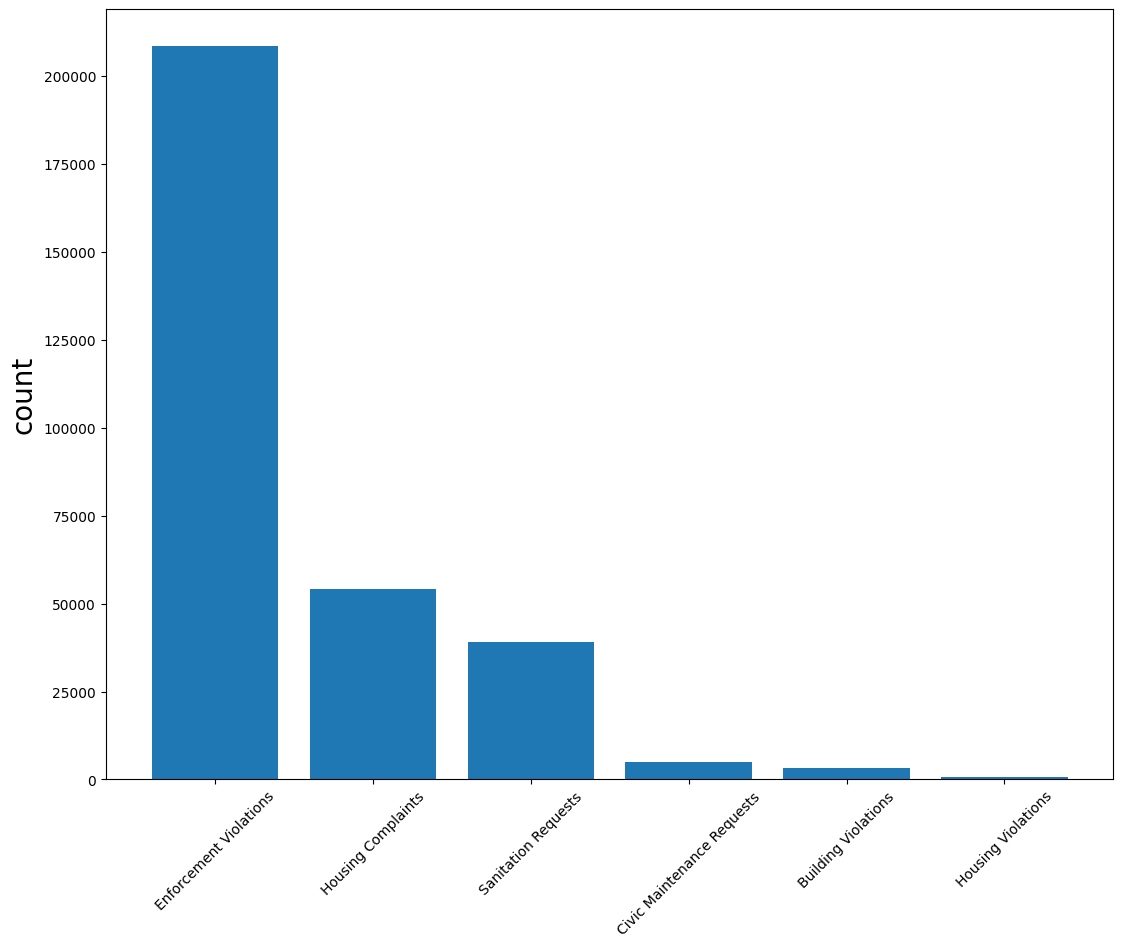

In [12]:
plt.figure(figsize=(13, 10))
plt.bar(df_['violation_type'], df_['count'])
plt.ylabel("count", fontsize=20)
plt.xticks(fontsize=10,rotation=45)
plt.yticks(fontsize=10)
plt.savefig("extension/RentSmart Violation Type Bar Plot.png")
plt.show()

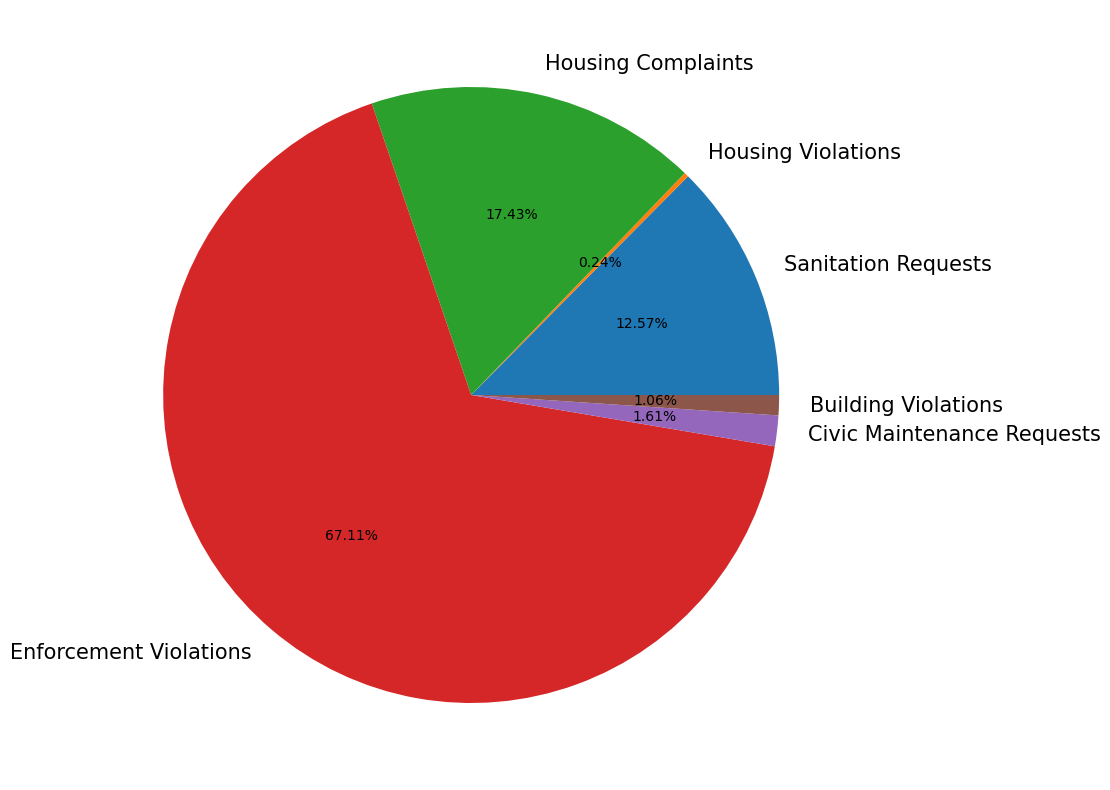

In [35]:
df_ = df_.sort_values(by="violation_type", ascending=False)
plt.figure(figsize=(13, 10))
patches,l_text,p_text = plt.pie(df_['count'],labels=df_['violation_type'],autopct='%.2f%%')
for t in l_text:
    t.set_size(15)
for t in p_text:
    t.set_size(10)
plt.savefig("extension/RentSmart Violation Type Pie Chart.png")
plt.show()

# Count Number of Different Violation Types(BAPV)

In [13]:
df_ = df_Building.groupby(["description"])['status_dttm'].count().reset_index().sort_values(by="status_dttm", ascending=False)
df_.rename(columns={'status_dttm':'count'}, inplace = True)
df_.index = range(len(df_))
df_

,description,count
0,Unsafe and Dangerous,3402
1,Failure to Obtain Permit,3381
2,Owners Responsibility to Maintain Structural E...,1495
3,Maintenance,1096
4,Owners Installation/Maintenance Responsibility...,1013
...,...,...
478,Exterior Wall Envelope,1
479,Point of Attachment,1
480,Exposed work,1
481,Exit Enclosures,1


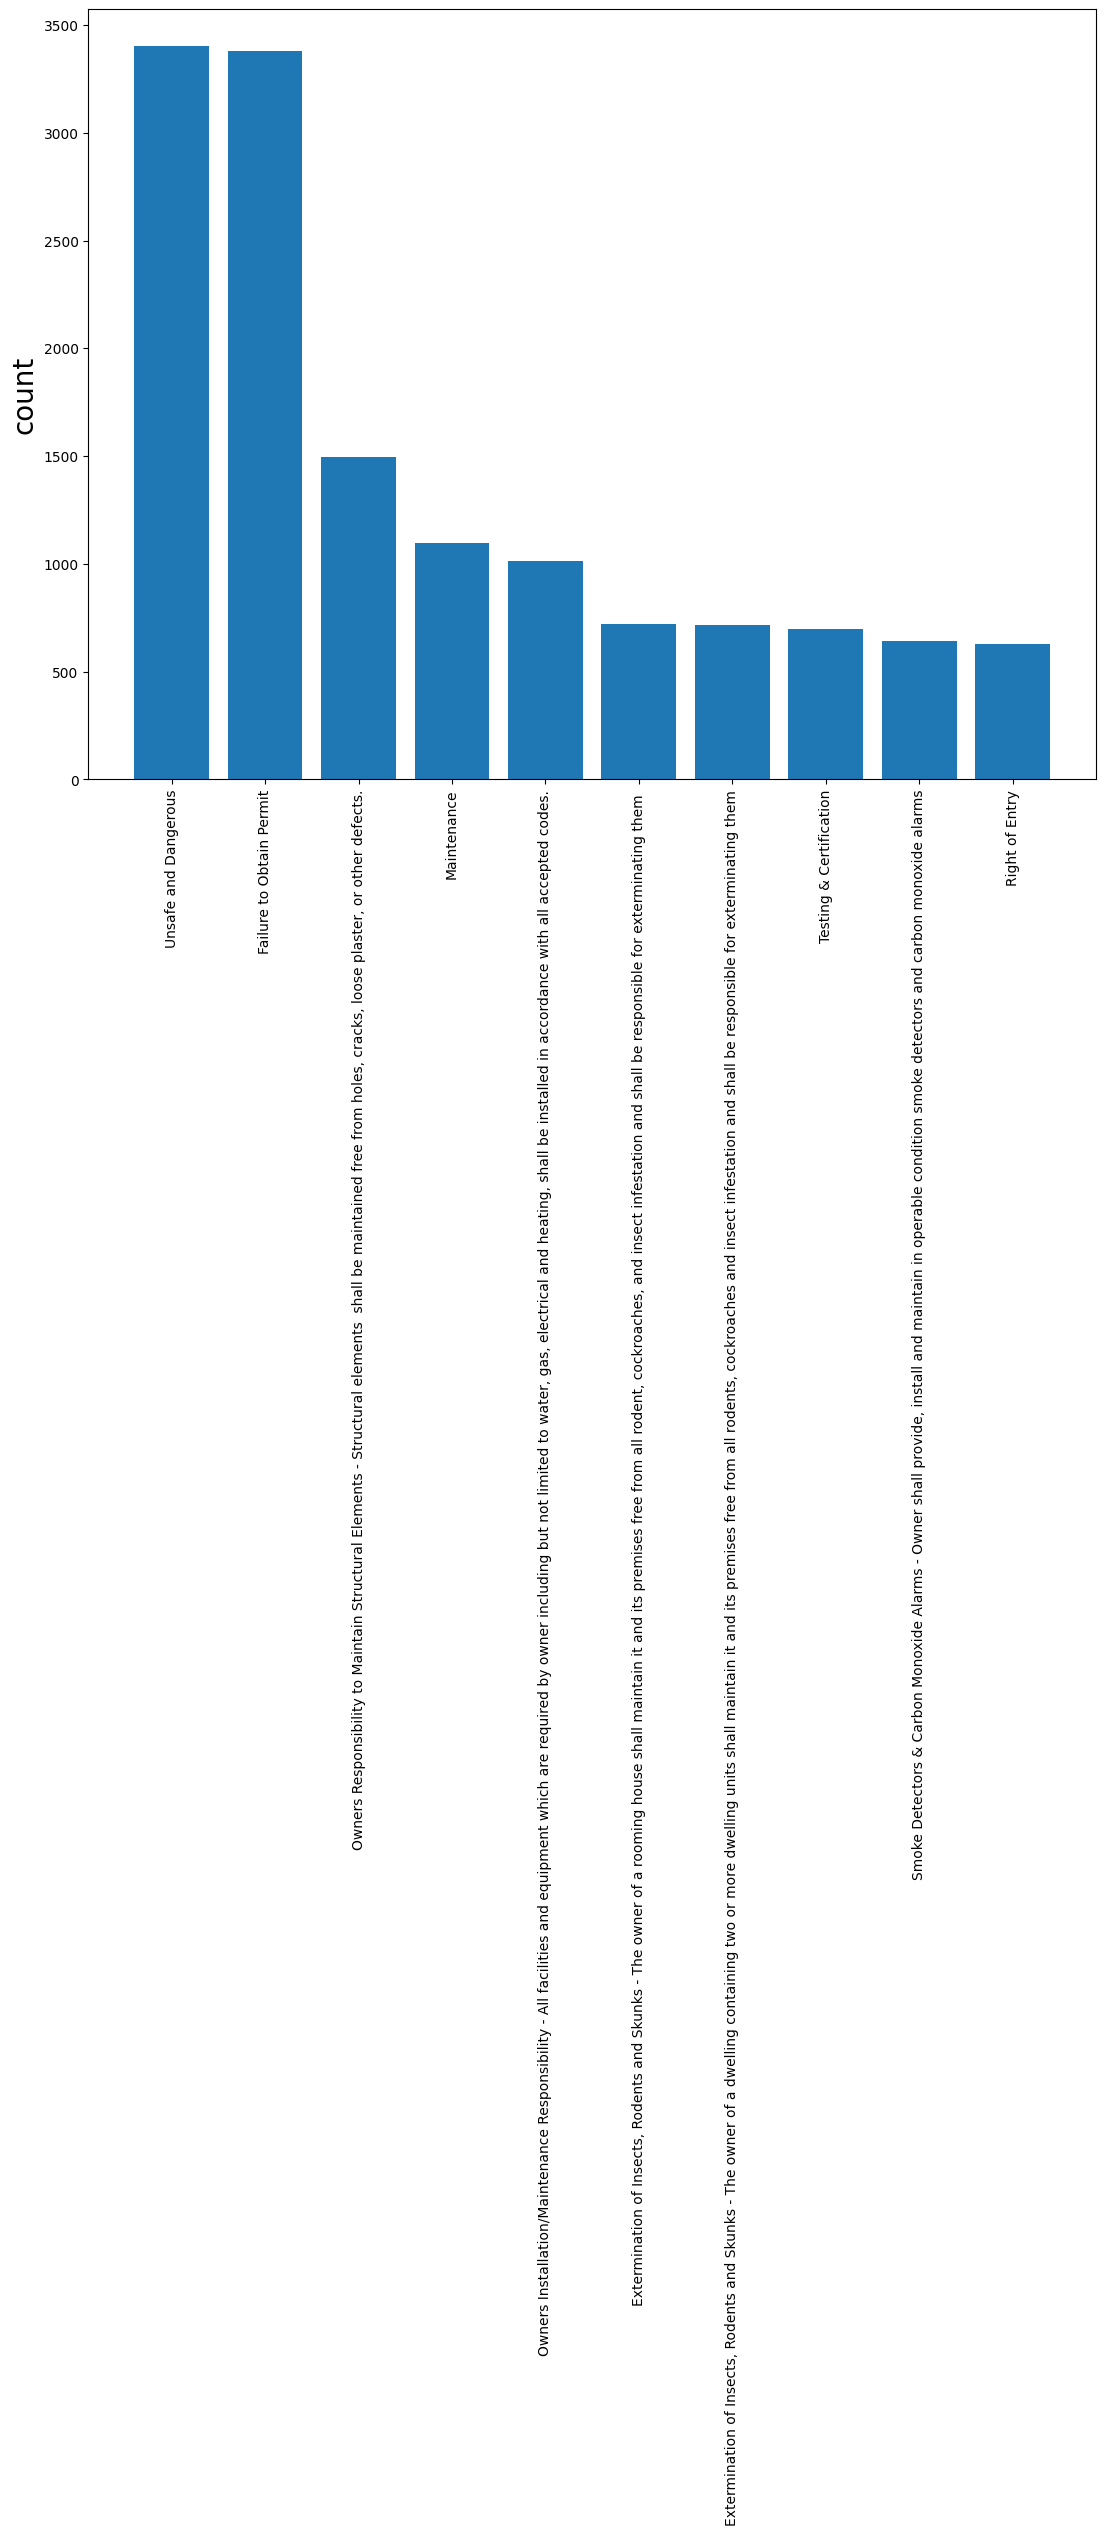

In [37]:
plt.figure(figsize=(13, 10))
plt.bar(df_['description'][:10], df_['count'][:10])
plt.ylabel("count", fontsize=20)
plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=10)
plt.savefig("extension/BAPV Violation Type Bar Plot.png")
plt.show()

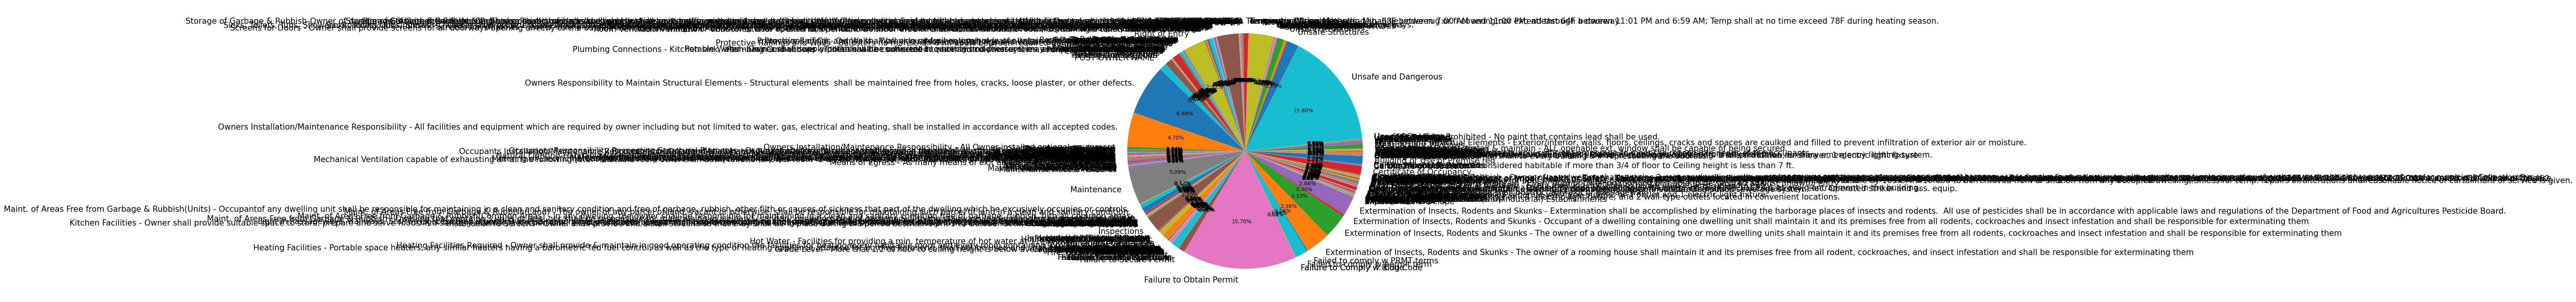

In [14]:
df_ = df_.sort_values(by="description", ascending=False)
plt.figure(figsize=(13, 10))
patches,l_text,p_text = plt.pie(df_['count'],labels=df_['description'],autopct='%.2f%%')
for t in l_text:
    t.set_size(15)
for t in p_text:
    t.set_size(10)
plt.savefig("extension/BAPV Violation Type Pie Chart .png")
plt.show()

# Q3

# Count Number of Violations/Complaints On A Landlord(RS)

In [15]:
df_ = df_RentSmart.groupby(["owner"])['date'].count().reset_index().sort_values(by="date", ascending=False)
df_.rename(columns={'date':'count'}, inplace = True)
df_.index = range(len(df_))
df_[:20]

,owner,count
0,GBM PORTFOLIO OWNER LLC,2187
1,BOBSON RESIDENTIAL LLC,497
2,TS LAND TRUST LLC,446
3,CESCO LLC MASS LLC,440
4,COPLEY CONDOMINIUM TRUST,399
5,JPNDC PITTS LLC,370
6,SOLSKINN PROPERTIES LLC,362
7,LACONCHA LIMITED PARTNERSHIP,357
8,ROIFF PAUL G TS,351
9,ROIFF PAUL G,338


C:\Users\yuesiliu\AppData\Local\Temp\ipykernel_28380\2452658367.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.barh(df_1['owner'][:20], df_1['count'][:20])


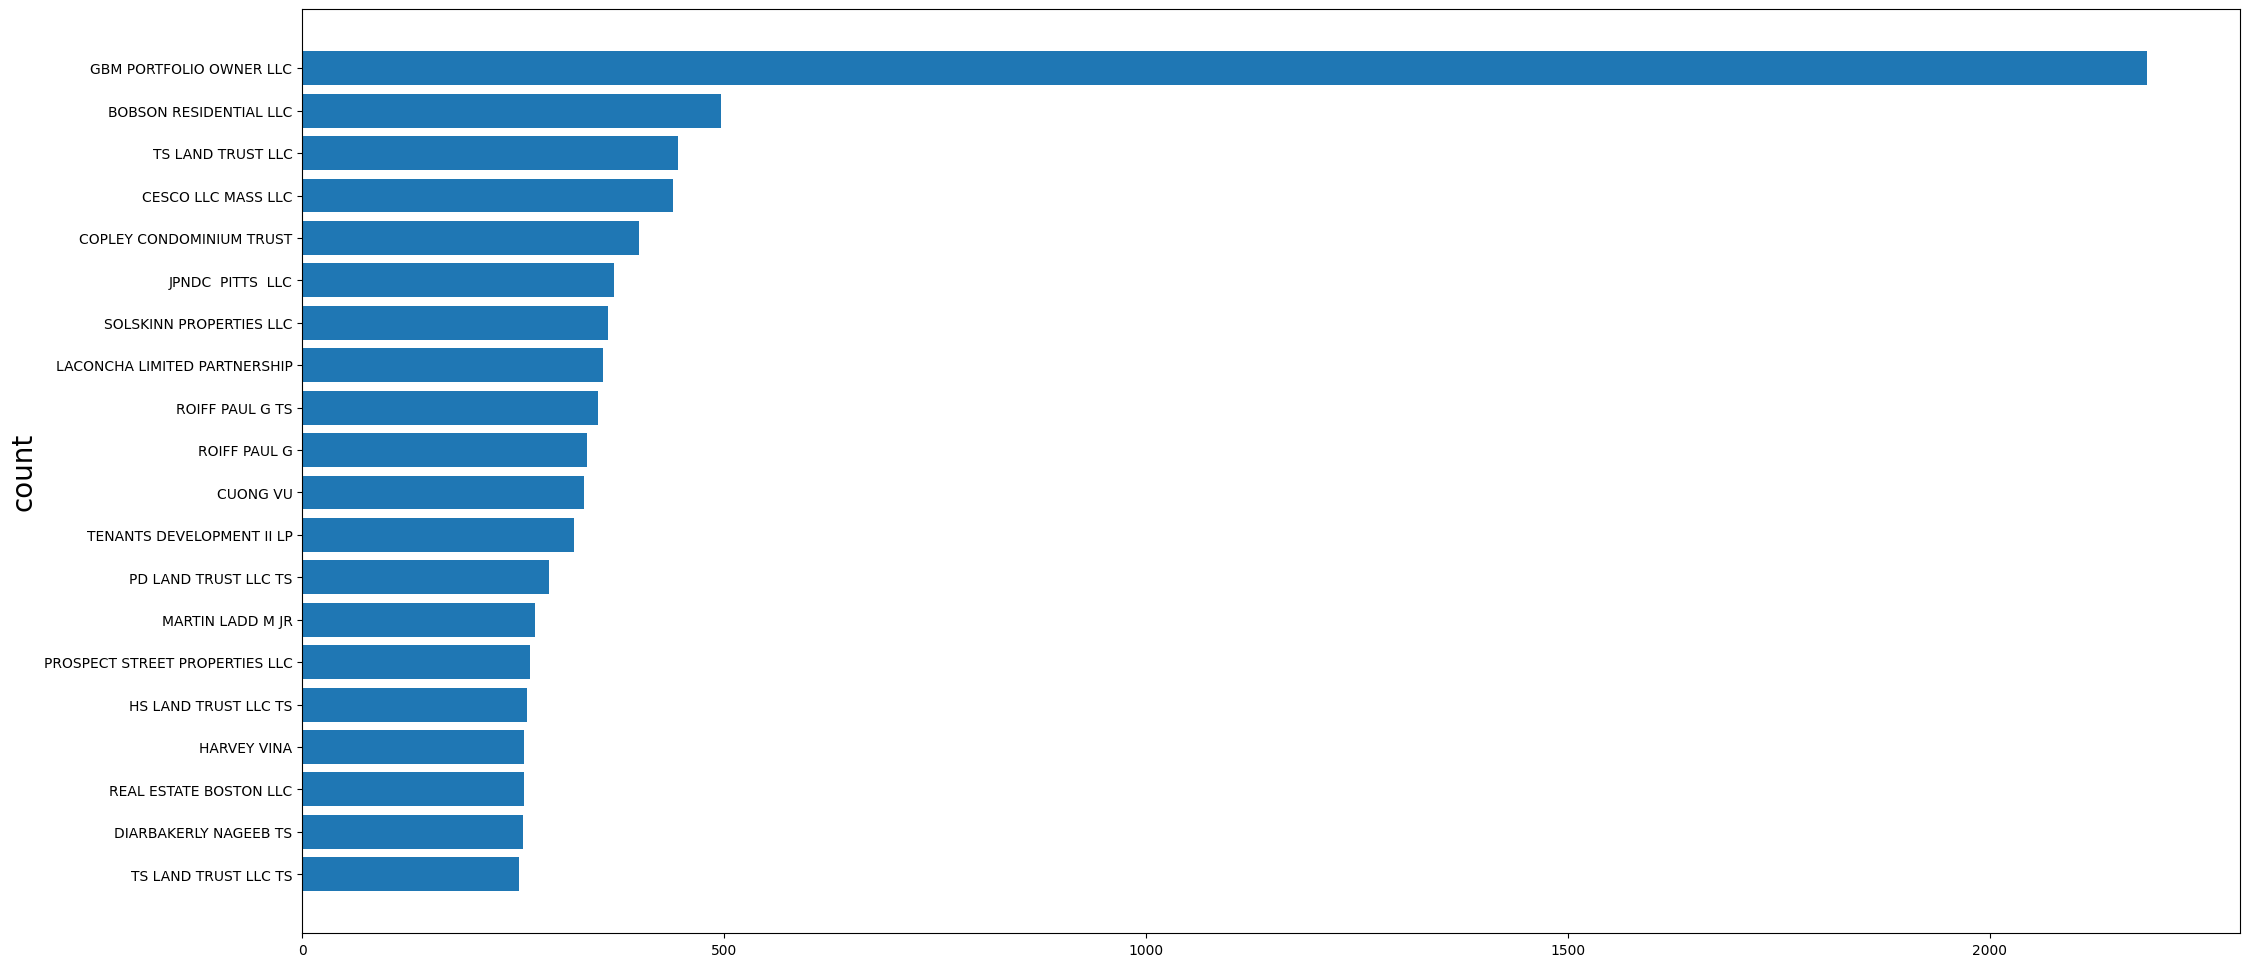

In [16]:
plt.figure(figsize=(25, 12))
df_1 = df_[:20].sort_values(by="count", ascending=True)
plt.barh(df_1['owner'][:20], df_1['count'][:20])
plt.ylabel("count", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig("extension/RentSmart Owner count Bar Plot.png")
plt.show()

# Count Number of Violations/Complaints On A Landlord(BAPV)

In [23]:
def deal_addr(s):
    # transform address to lower case and replace street with st at last remove # symbol which appears in some tuples in BAPV 
    addrs = str(s).lower().replace('street','st').split('#')[0]
    return addrs

df_boston = pd.read_csv('./extension/Boston Assessor added Income Restricted.csv', low_memory=False)
df_boston[:3]

df_boston.rename(columns={'SITE_ADDR':'contact_addr1'}, inplace = True)
df_boston['contact_addr1'] = df_boston['contact_addr1'].apply(deal_addr)
df_Building['contact_addr1'] = df_Building['contact_addr1'].apply(deal_addr)

dff1 = pd.merge(df_boston,df_Building,on='contact_addr1')
dff1

df_ = dff1.groupby(["OWNER1"])['PROP_ID'].count().reset_index().sort_values(by="PROP_ID", ascending=False)
df_.rename(columns={'PROP_ID':'count'}, inplace = True)
df_.index = range(len(df_))
df_
# dff1.to_csv("./test.csv")


,OWNER1,count
0,CABOOSE PROPERTIES LLC,74
1,ONE HUNDRED HALLET ST LLC A MASS LLC,52
2,WILLIAMS NORMAN W,36
3,JONES JOHN C,28
4,TRAN KHANH D,28
...,...,...
3521,HOO WILLIAM W SOO,1
3522,HOPE HOUSE III INC,1
3523,HORN ZACHARY,1
3524,HORTON HOWARD E,1


C:\Users\yuesiliu\AppData\Local\Temp\ipykernel_28380\2123991244.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.barh(df_1['OWNER1'][:20], df_1['count'][:20])


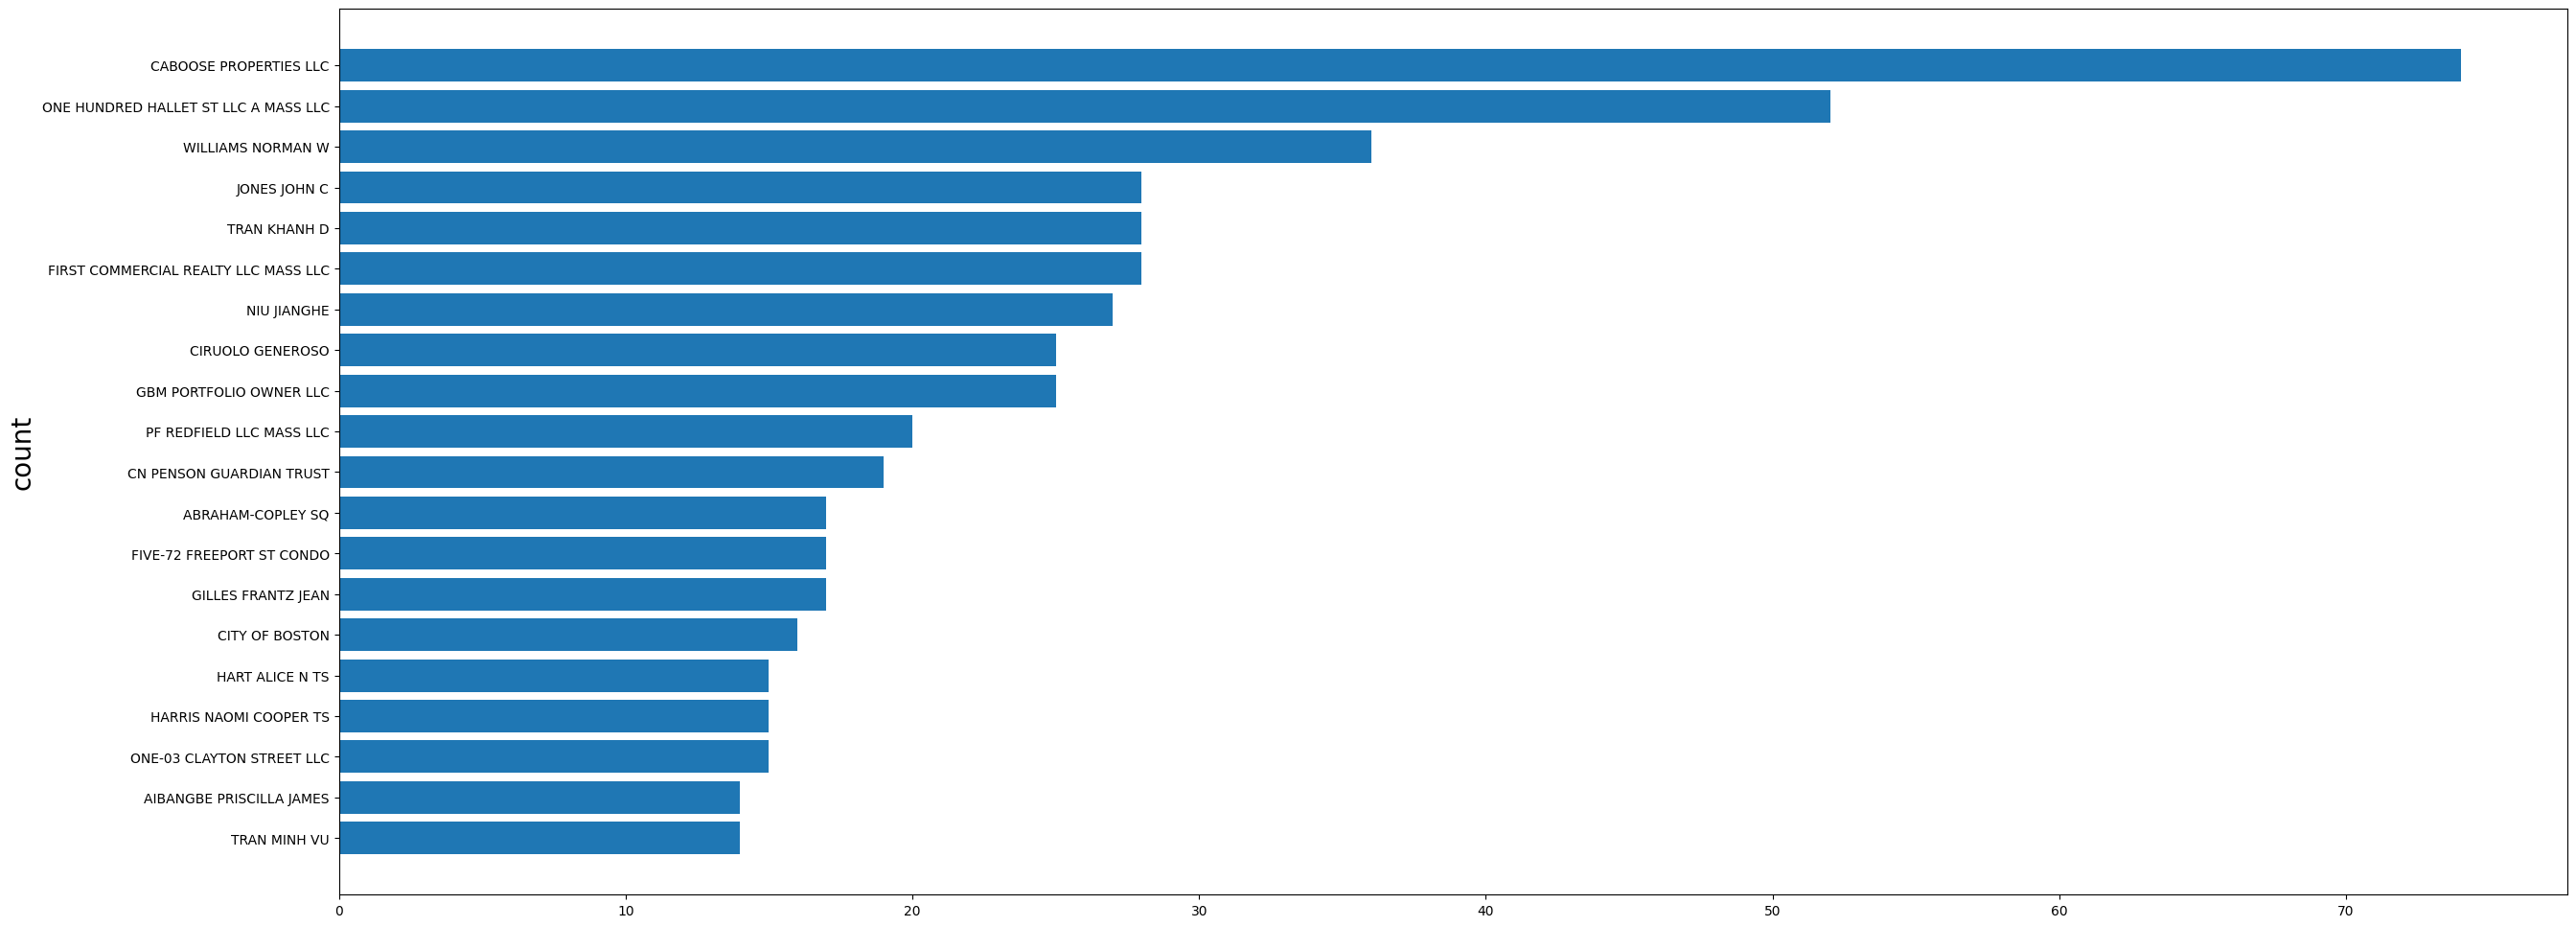

In [26]:
plt.figure(figsize=(30, 12))
df_1 = df_[:20].sort_values(by="count", ascending=True)
plt.barh(df_1['OWNER1'][:20], df_1['count'][:20])
plt.ylabel("count", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig("extension/BAPV Owner count Bar Plot.png")
plt.show()

# Q4

# Count Number of Violations/Complaints on Zip Code(RS)

In [41]:
df_ = df_RentSmart.groupby(["zip_code"])['date'].count().reset_index().sort_values(by="date", ascending=False)
df_.rename(columns={'date':'count'}, inplace = True)
df_[['zip_code']] = df_[['zip_code']].astype(str)
df_.index = range(len(df_))
df_

,zip_code,count
0,2124,25513
1,2127,21165
2,2135,19938
3,2125,19839
4,2128,17580
5,2118,17535
6,2134,16179
7,2121,15774
8,2116,14742
9,2126,14640


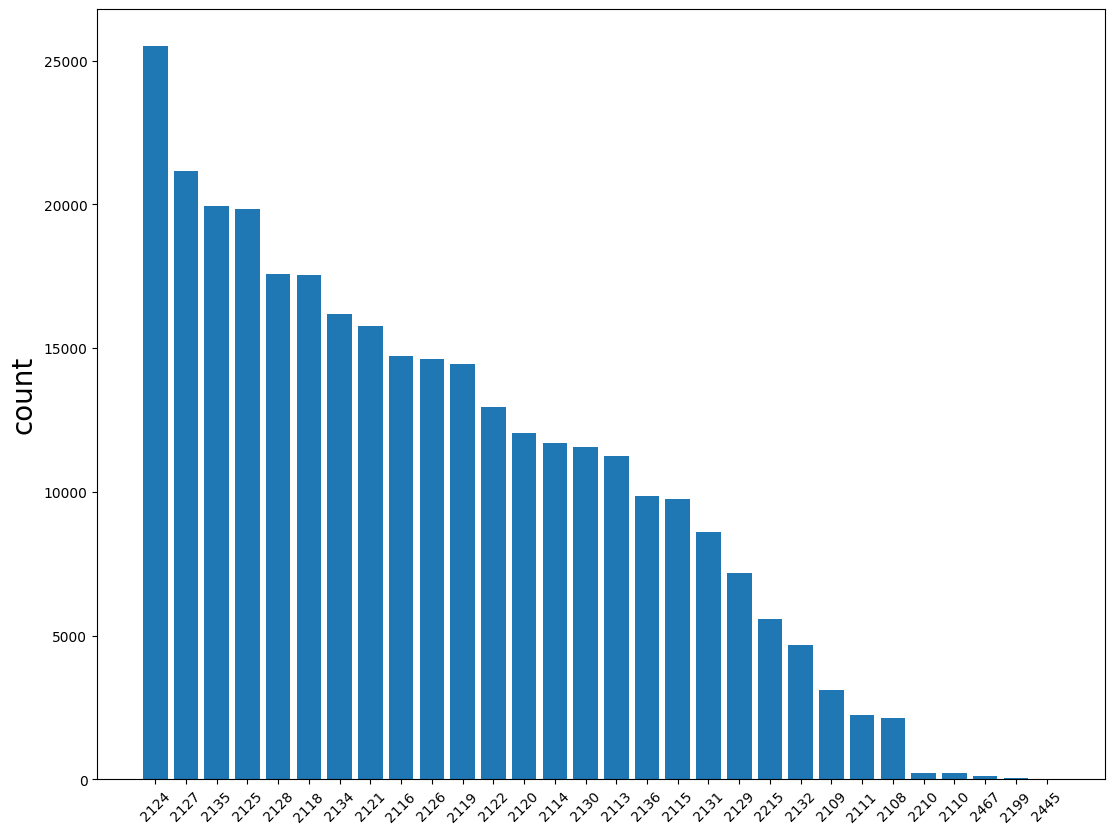

In [42]:
plt.figure(figsize=(13, 10))
plt.bar(df_['zip_code'], df_['count'])
plt.ylabel("count", fontsize=20)
plt.xticks(fontsize=10,rotation=45)
plt.yticks(fontsize=10)
plt.savefig("extension/RentSmart Zip Code Bar Plot.png")
plt.show()

# Count Number of Violations/Complaints on Zip Code(BAPV)

In [43]:
df_ = df_Building.groupby(["violation_zip"])['status_dttm'].count().reset_index().sort_values(by="status_dttm", ascending=False)
df_.rename(columns={'status_dttm':'count'}, inplace = True)
df_[['violation_zip']] = df_[['violation_zip']].astype(str)
df_.index = range(len(df_))
df_

,violation_zip,count
0,02124,2144
1,02121,2103
2,02128,2040
3,02119,1678
4,02125,1442
5,02126,1170
6,02122,1156
7,02127,1144
8,02135,899
9,02136,891


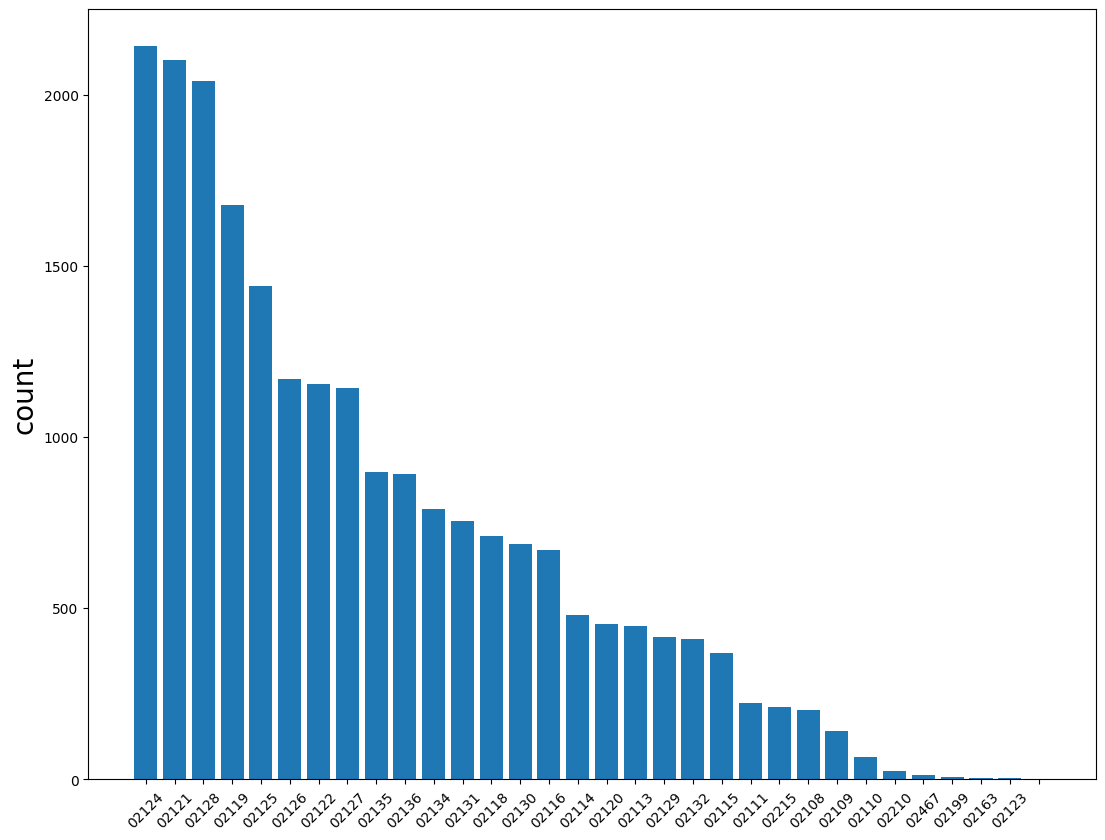

In [44]:
plt.figure(figsize=(13, 10))
plt.bar(df_['violation_zip'], df_['count'])
plt.ylabel("count", fontsize=20)
plt.xticks(fontsize=10,rotation=45)
plt.yticks(fontsize=10)
plt.savefig("extension/Building Violation Zip Bar Plot.png")
plt.show()

# Q5

# Count Number of Violations/Complaints on Different City/Neighborhood(RS)

In [45]:
df_ = df_RentSmart.groupby(["neighborhood"])['date'].count().reset_index().sort_values(by="date", ascending=False)
df_.rename(columns={'date':'count'}, inplace = True)
df_.index = range(len(df_))
df_

,neighborhood,count
0,Dorchester,74072
1,Boston,60893
2,Roxbury,31974
3,South Boston,21166
4,Brighton,19930
5,East Boston,17581
6,Allston,16197
7,Mattapan,14651
8,Mission Hill,12108
9,Jamaica Plain,11540


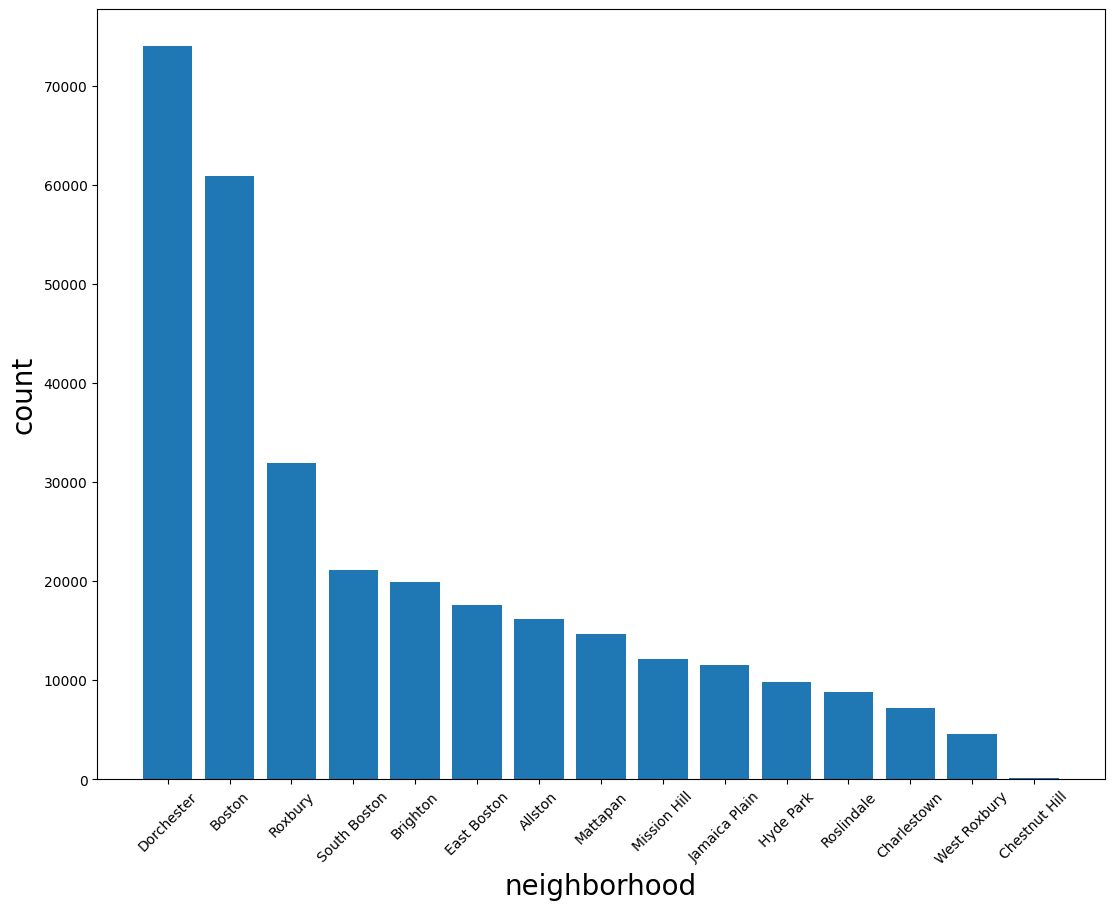

In [46]:
plt.figure(figsize=(13, 10))
plt.bar(df_['neighborhood'], df_['count'])
plt.xlabel("neighborhood", fontsize=20)
plt.ylabel("count", fontsize=20)
plt.xticks(fontsize=10,rotation=45)
plt.yticks(fontsize=10)
plt.savefig("extension/RentSmart Neighborhood Bar Plot.png")
plt.show()

# Count Number of Violations/Complaints on Different City/Neighborhood(BAPV)

In [47]:
df_ = df_Building.groupby(["violation_city"])['status_dttm'].count().reset_index().sort_values(by="status_dttm", ascending=False)
df_.rename(columns={'status_dttm':'count'}, inplace = True)
df_.index = range(len(df_))
df_

,violation_city,count
0,Dorchester,6853
1,Boston,2954
2,Roxbury,2338
3,East Boston,2032
4,Mattapan,1191
5,South Boston,1132
6,Hyde Park,879
7,Brighton,865
8,Allston,786
9,Roslindale,748


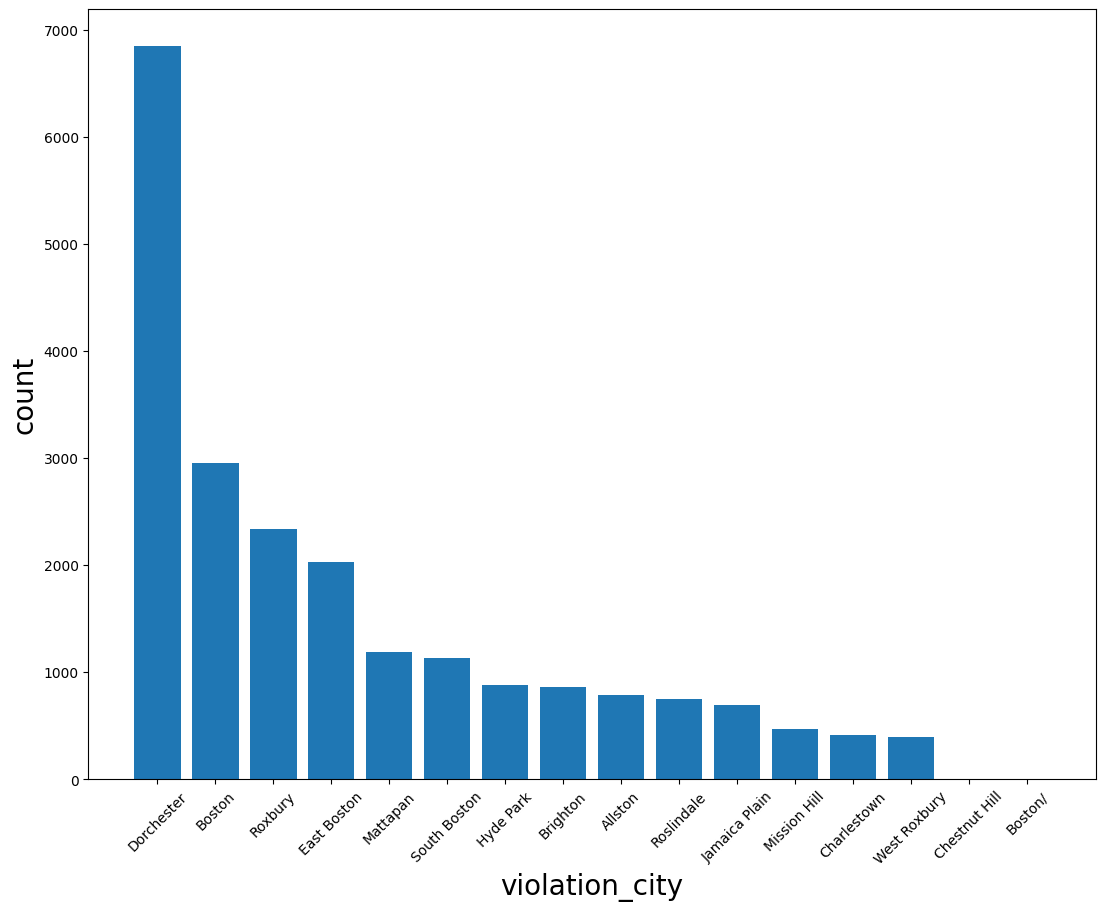

In [48]:
plt.figure(figsize=(13, 10))
plt.bar(df_['violation_city'], df_['count'])
plt.xlabel("violation_city", fontsize=20)
plt.ylabel("count", fontsize=20)
plt.xticks(fontsize=10,rotation=45)
plt.yticks(fontsize=10)
plt.savefig("extension/BAPV Violation City Bar Plot.png")
plt.show()